# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'NZDUSD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

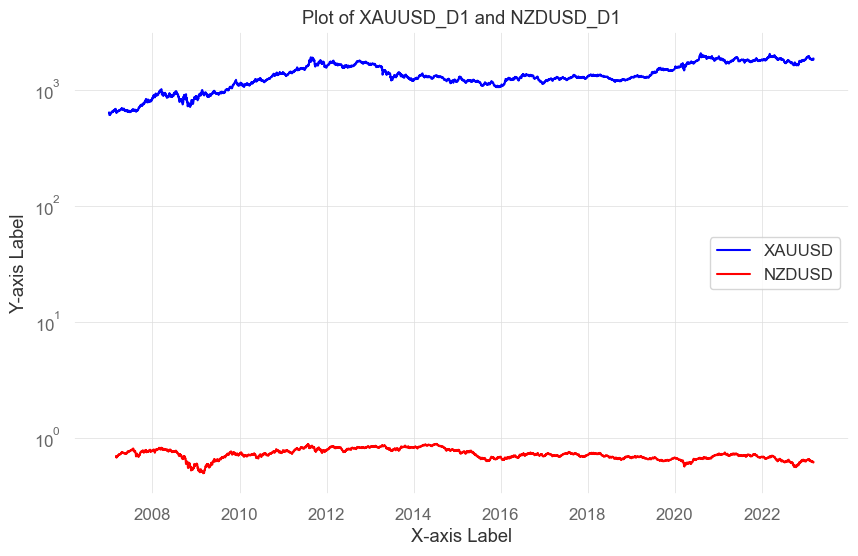

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          7.377e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:46:18   Log-Likelihood:                         -36470.
No. Observations:                5011   AIC:                                  7.294e+04
Df Residuals:                    5010   BIC:                                  7.295e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1861.0042      6.852    271.603      0.000    1847.571    1874.437
==============================================================================
Omnibus:                       73.611   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.575
Skew:                           0.199   Prob(JB):                     7.02e-14
Kurtosis:                       2.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -67.54%
CAGR﹪                     -4.73%

Sharpe                     -0.28
Prob. Sharpe Ratio         10.68%
Smart Sharpe               -0.27
Sortino                    -0.38
Smart Sortino              -0.37
Sortino/√2                 -0.27
Smart Sortino/√2           -0.26
Omega                      0.95

Max Drawdown               -80.24%
Longest DD Days            5727
Volatility (ann.)          15.84%
Calmar                     -0.06
Skew                       -0.6
Kurtosis                   10.07

Expected Daily %           -0.02%
Expected Monthly %         -0.58%
Expected Yearly %          -6.4%
Kelly Criterion            -2.66%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.66%
Expected Shortfall (cVaR)  -1.66%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-06,2019-06-30,2023-03-10,5727,-80.238379,-79.461588
2,2007-05-02,2007-05-06,2007-05-13,12,-2.713239,-2.598093
3,2007-06-10,2007-06-17,2007-06-25,16,-2.491189,-2.485827
4,2007-03-04,2007-03-07,2007-03-11,8,-2.338705,-1.531612
5,2007-04-03,2007-04-06,2007-04-25,23,-1.858581,-1.772942


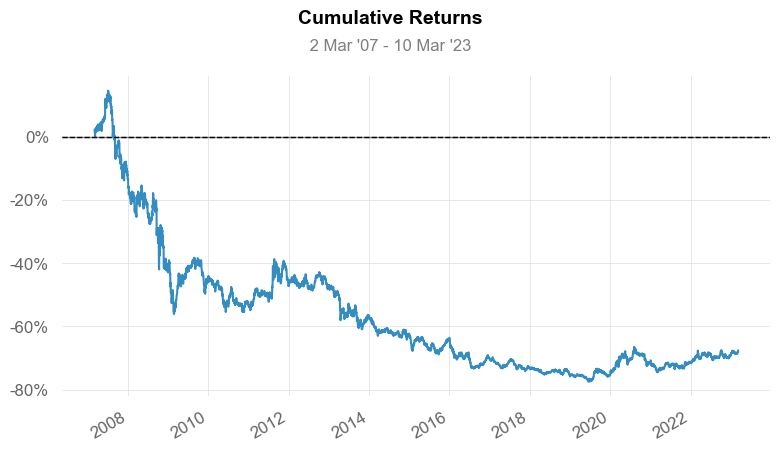

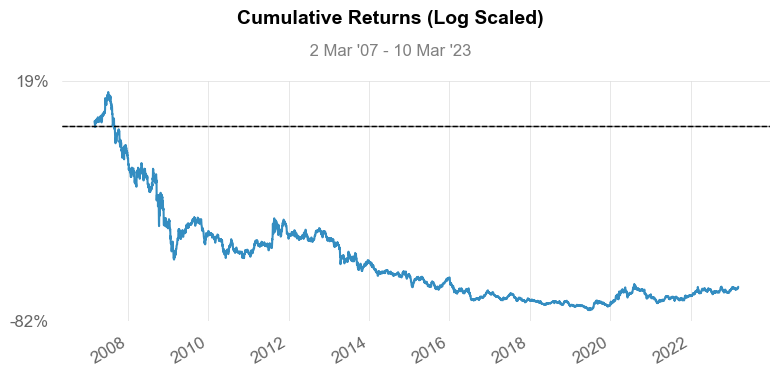

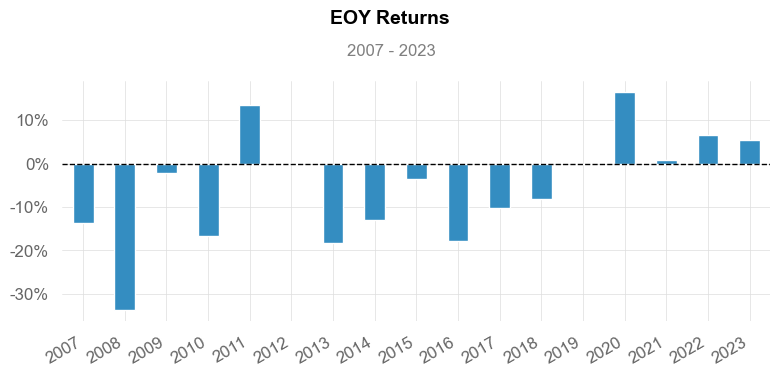

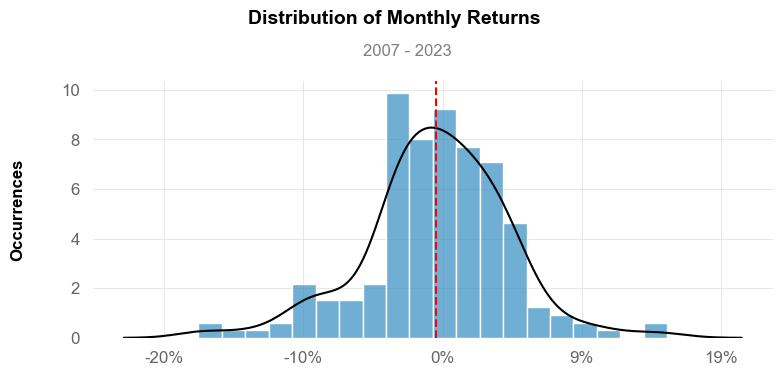

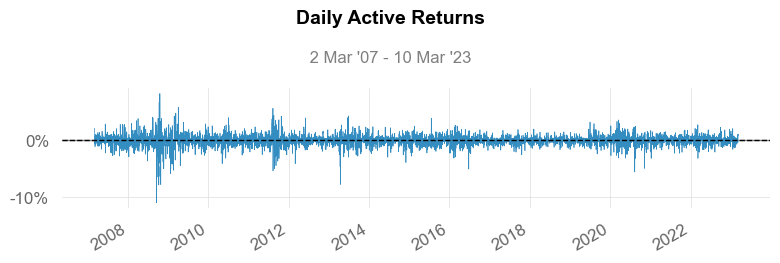

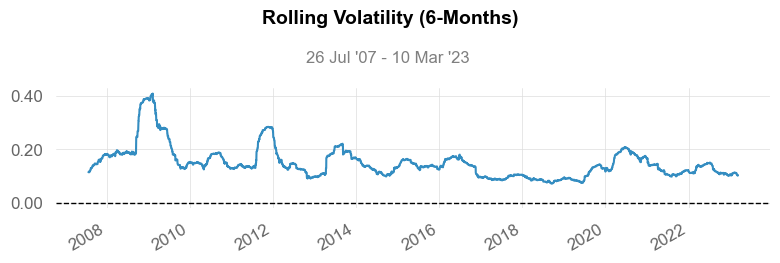

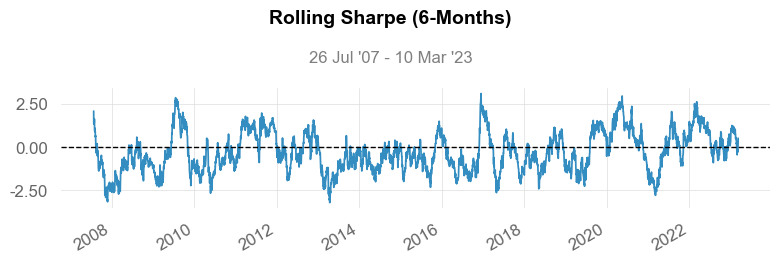

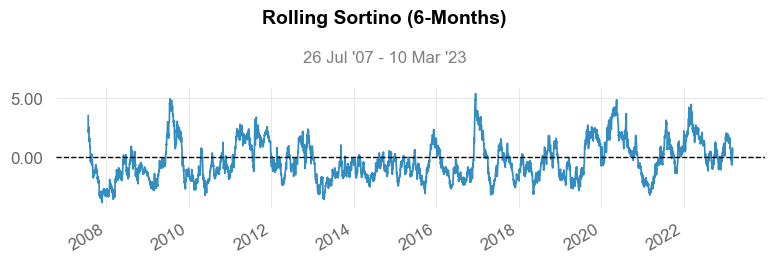

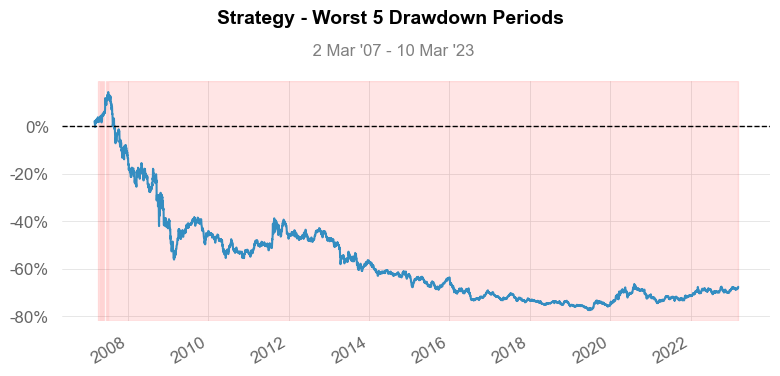

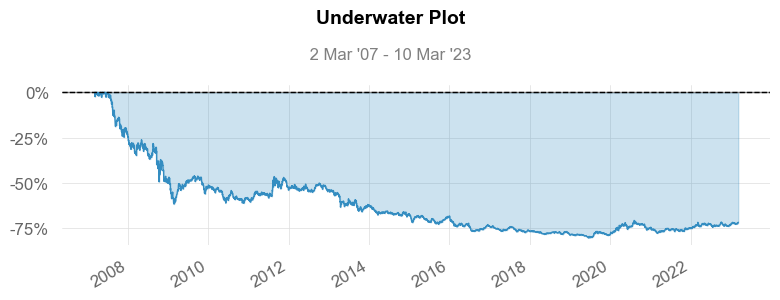

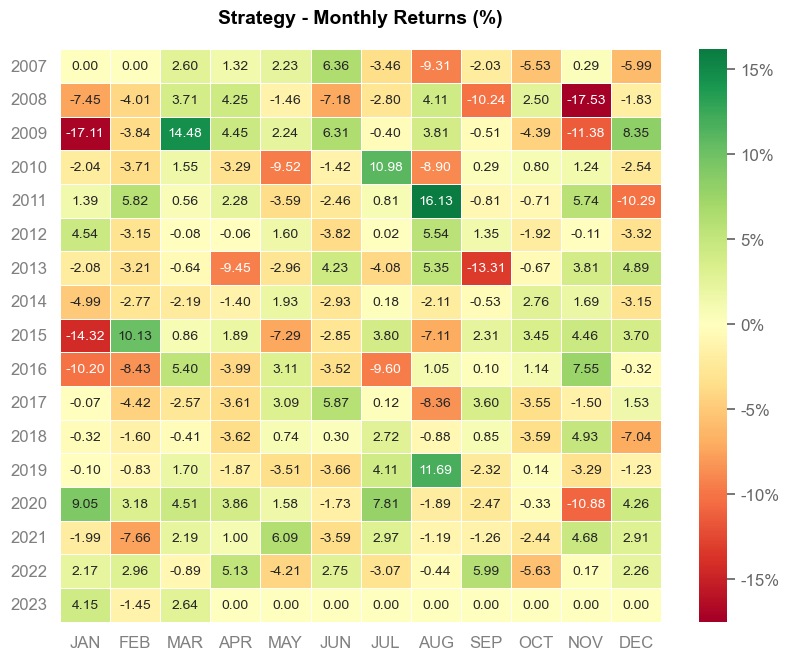

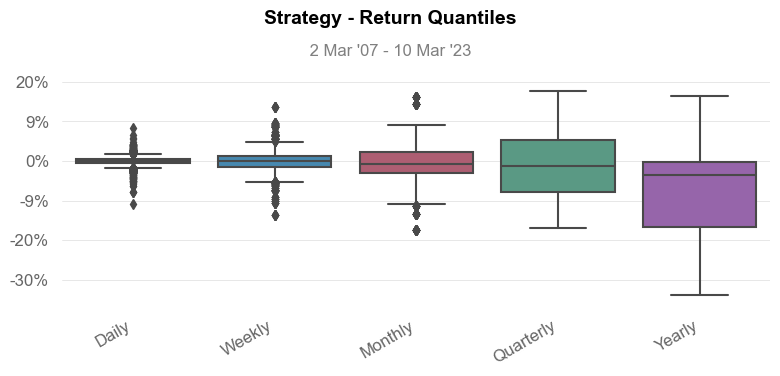

In [12]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [13]:
TF = 'H4'

In [14]:
data_1 = XAUUSD[TF]

In [15]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

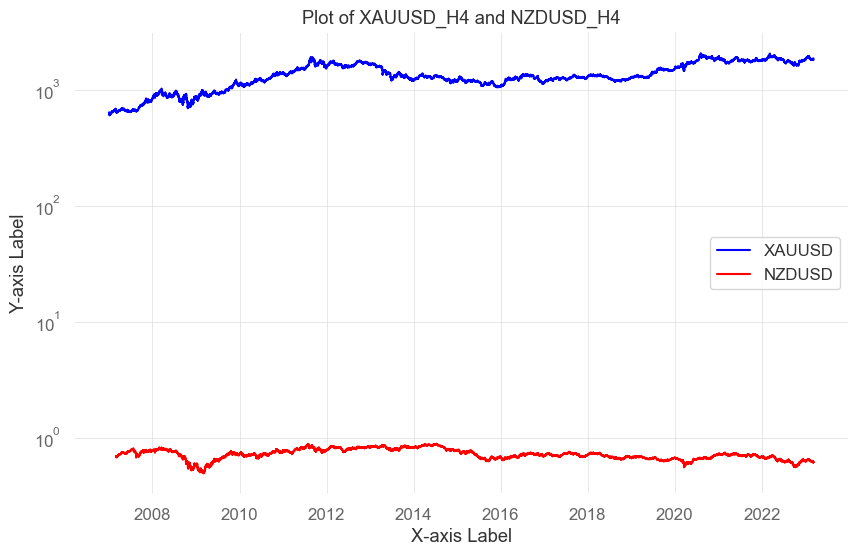

In [16]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [17]:
KF = Kalman_Filter(data_1, data_2)

In [18]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          3.804e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:47:55   Log-Likelihood:                     -1.8812e+05
No. Observations:               25848   AIC:                                  3.763e+05
Df Residuals:                   25847   BIC:                                  3.763e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.7997      3.017    616.765      0.000    1854.886    1866.713
==============================================================================
Omnibus:                      383.336   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.804
Skew:                           0.199   Prob(JB):                     1.19e-68
Kurtosis:                       2.636   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -41.55%
CAGR﹪                     -2.29%

Sharpe                     -0.47
Prob. Sharpe Ratio         1.76%
Smart Sharpe               -0.46
Sortino                    -0.64
Smart Sortino              -0.62
Sortino/√2                 -0.45
Smart Sortino/√2           -0.44
Omega                      0.91

Max Drawdown               -60.96%
Longest DD Days            5541
Volatility (ann.)          5.41%
Calmar                     -0.04
Skew                       -0.14
Kurtosis                   8.27

Expected Daily %           -0.01%
Expected Monthly %         -0.28%
Expected Yearly %          -3.11%
Kelly Criterion            -4.76%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.57%
Expected Shortfall (cVaR)  -0.57%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-01-08,2019-06-14,2023-03-10,5541,-60.961556,-60.406246
2,2007-08-27,2007-09-16,2007-10-15,50,-3.725339,-3.525927
3,2007-03-13,2007-06-20,2007-08-06,147,-3.510489,-3.326490
4,2007-08-09,2007-08-15,2007-08-21,13,-2.499157,-1.405617
5,2007-10-17,2007-11-11,2007-11-21,36,-2.149367,-2.141166


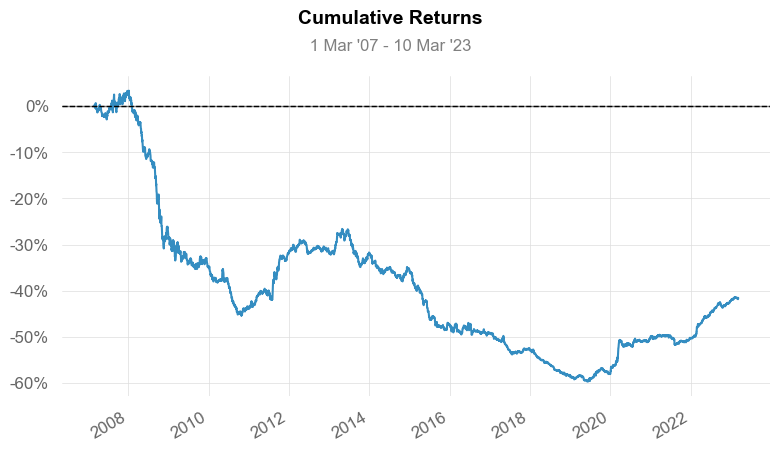

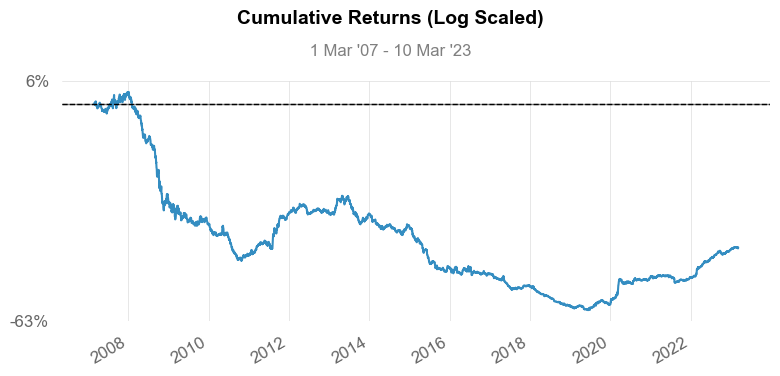

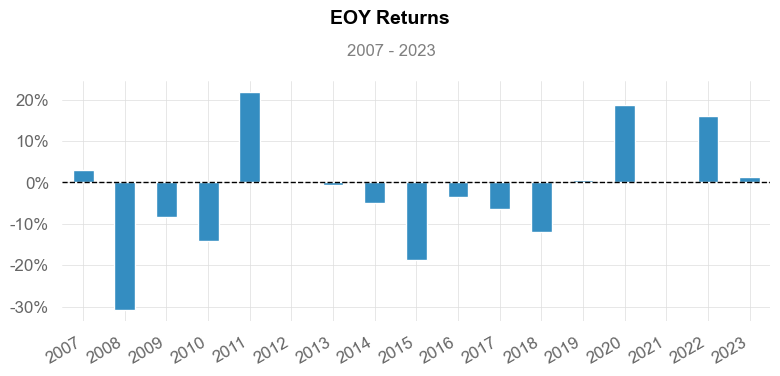

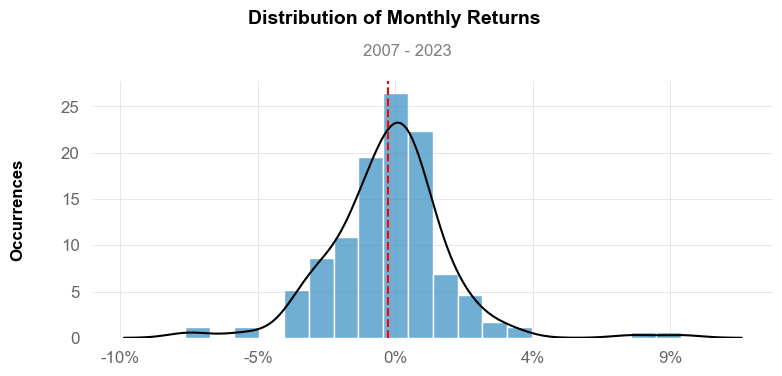

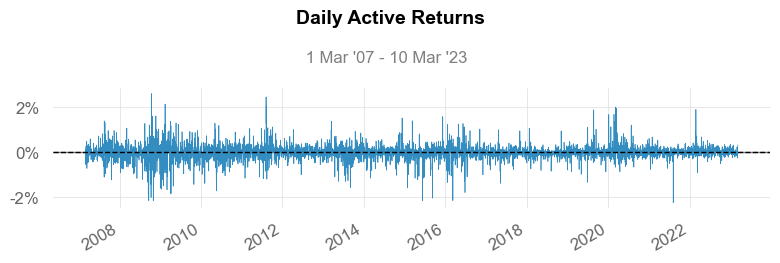

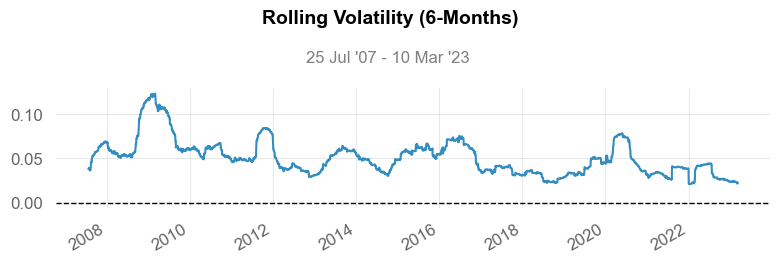

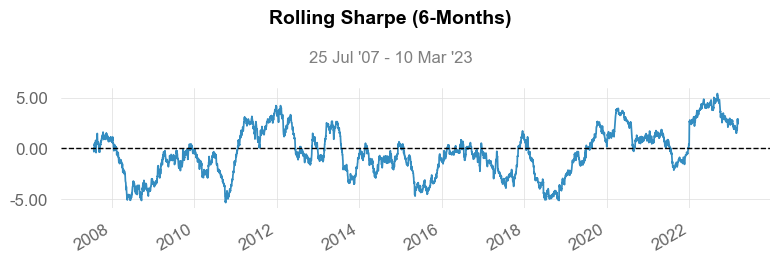

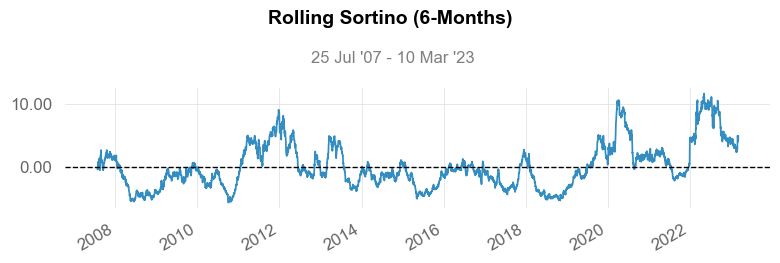

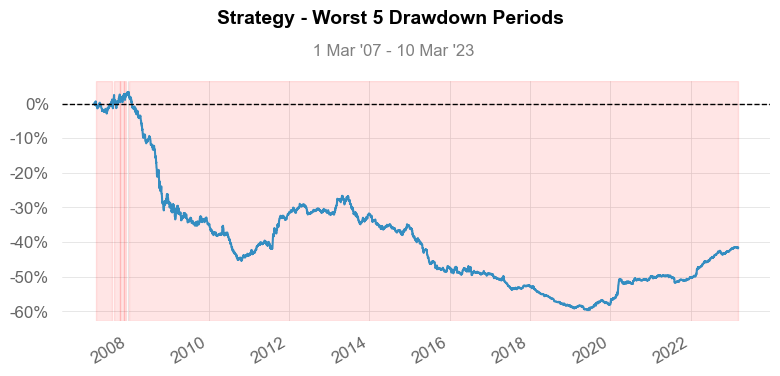

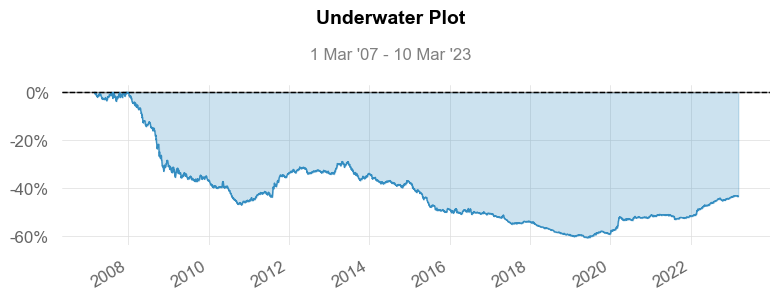

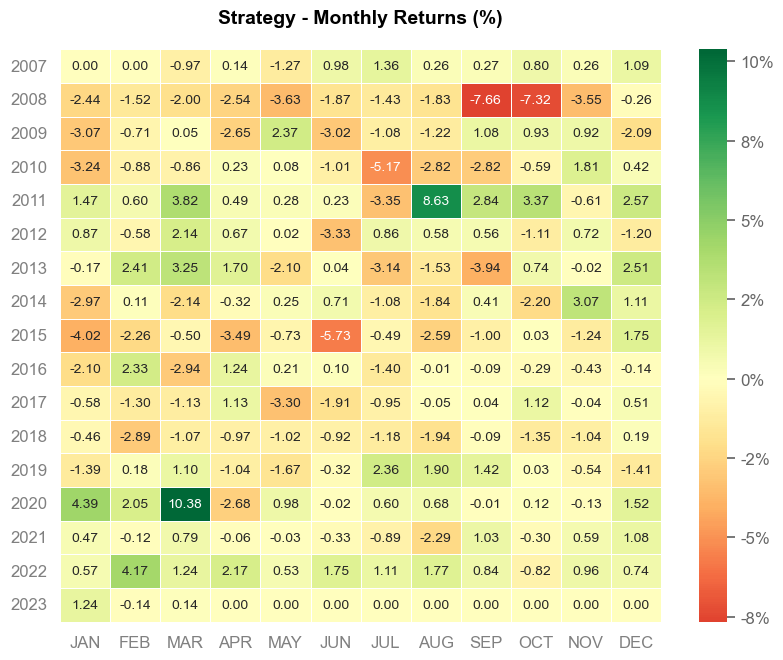

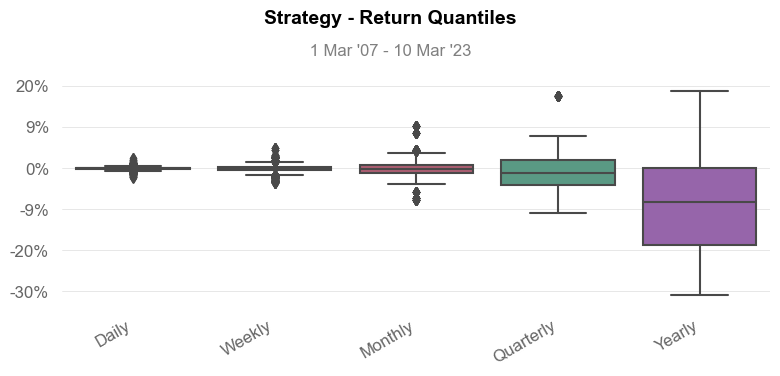

In [20]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [21]:
TF = 'H1'

In [22]:
data_1 = XAUUSD[TF]

In [23]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

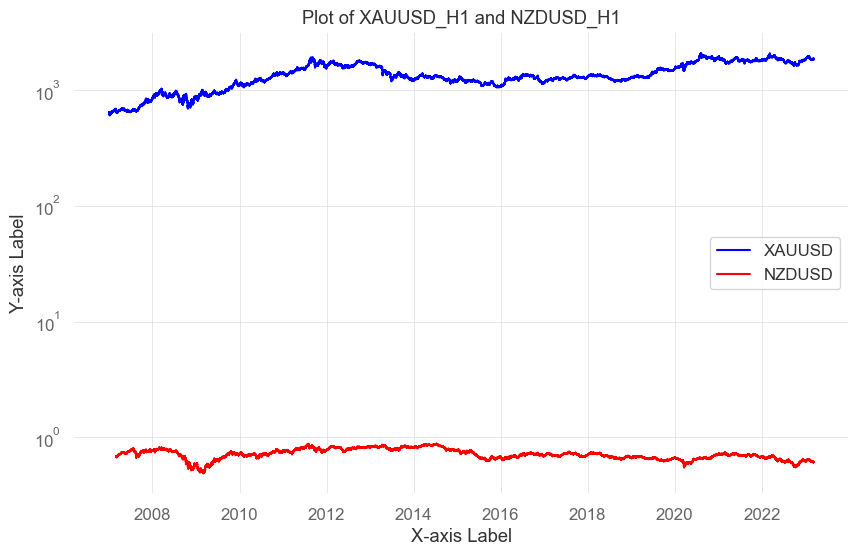

In [24]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [25]:
KF = Kalman_Filter(data_1, data_2)

In [26]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          1.472e+06
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:51:29   Log-Likelihood:                     -7.2788e+05
No. Observations:              100009   AIC:                                  1.456e+06
Df Residuals:                  100008   BIC:                                  1.456e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.7693      1.534   1213.107      0.000    1857.763    1863.776
==============================================================================
Omnibus:                     1484.399   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.633
Skew:                           0.198   Prob(JB):                    2.15e-263
Kurtosis:                       2.635   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -19.56%
CAGR﹪                     -0.93%

Sharpe                     -0.33
Prob. Sharpe Ratio         7.19%
Smart Sharpe               -0.32
Sortino                    -0.46
Smart Sortino              -0.45
Sortino/√2                 -0.32
Smart Sortino/√2           -0.32
Omega                      0.94

Max Drawdown               -37.74%
Longest DD Days            5675
Volatility (ann.)          3.18%
Calmar                     -0.02
Skew                       0.01
Kurtosis                   13.23

Expected Daily %           -0.0%
Expected Monthly %         -0.11%
Expected Yearly %          -1.27%
Kelly Criterion            -3.11%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-08-27,2019-06-14,2023-03-10,5675,-37.735860,-37.258353
2,2007-03-30,2007-05-30,2007-08-23,147,-2.793111,-2.739903
3,2007-03-04,2007-03-04,2007-03-07,4,-0.676759,-0.154272
4,2007-03-15,2007-03-26,2007-03-26,12,-0.532126,-0.418315
5,2007-03-09,2007-03-09,2007-03-12,4,-0.261513,-0.101193


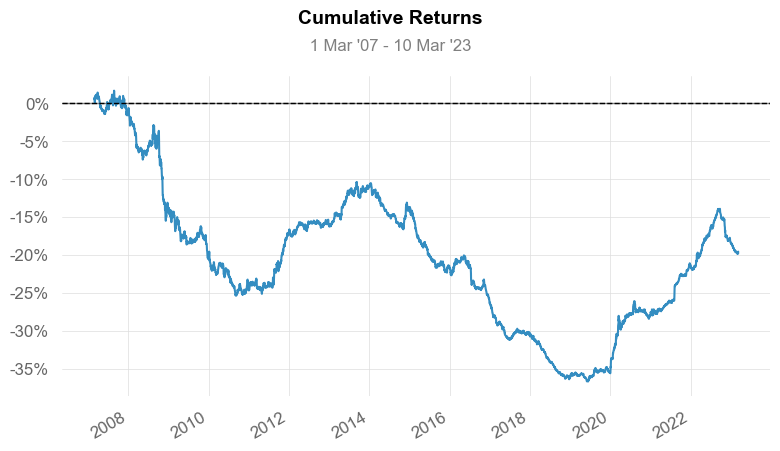

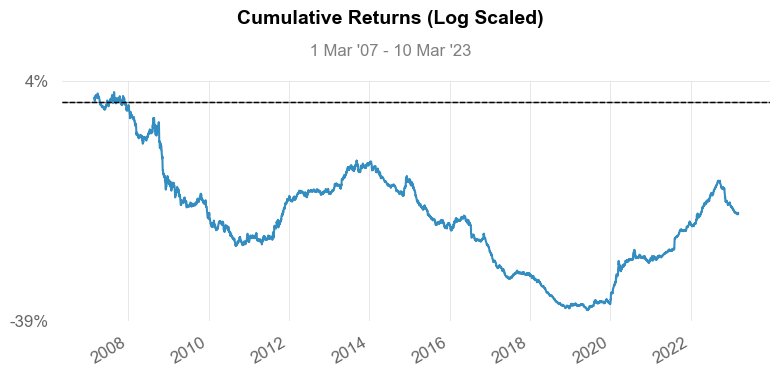

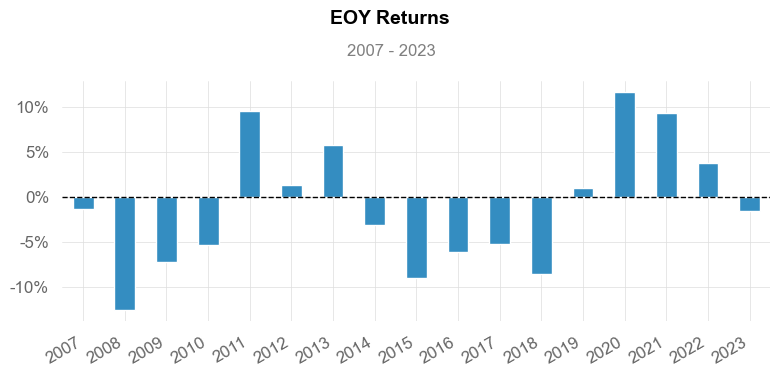

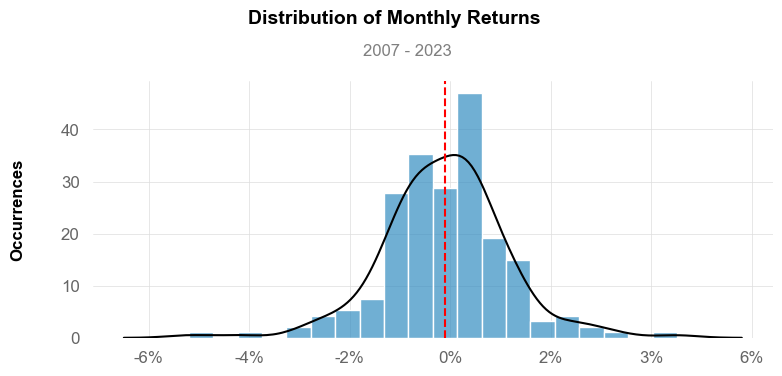

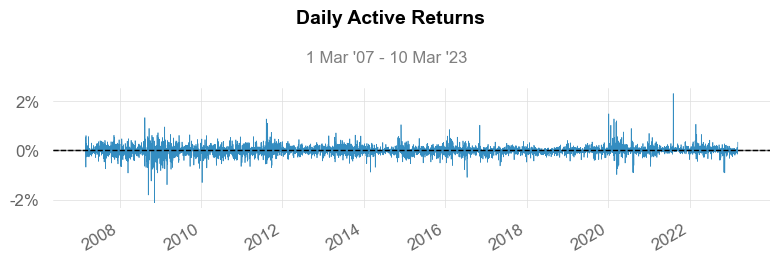

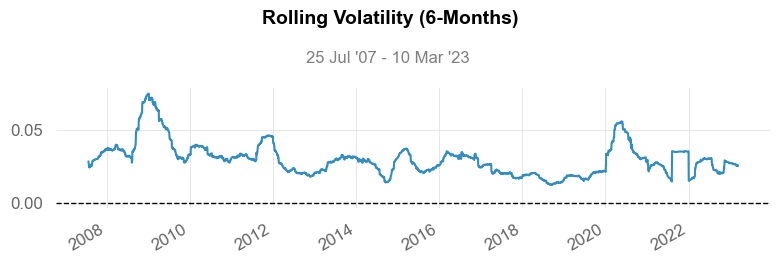

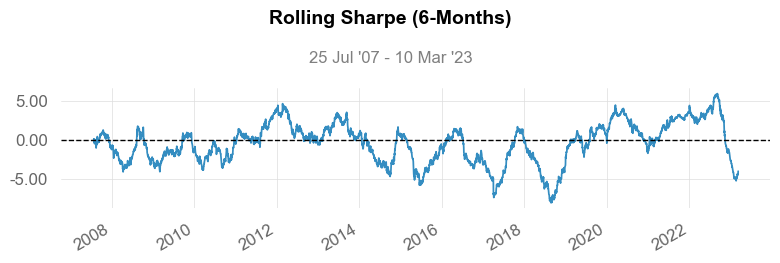

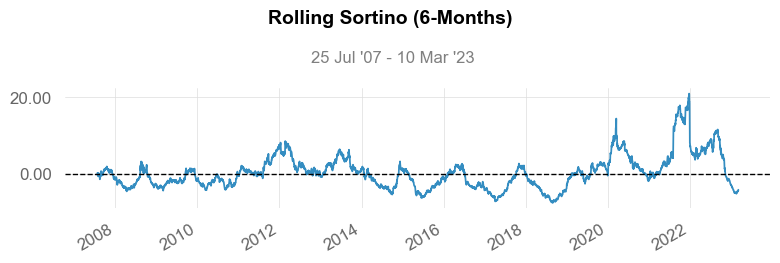

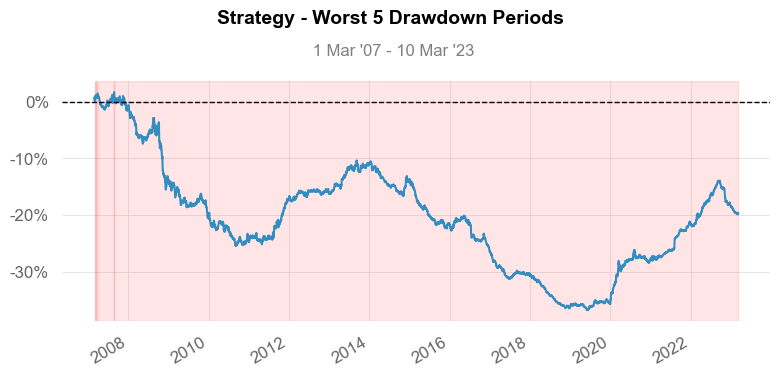

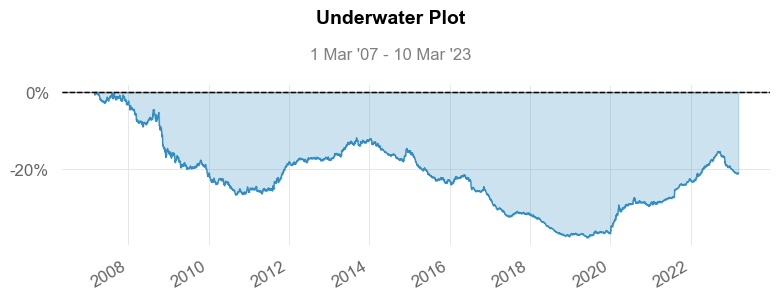

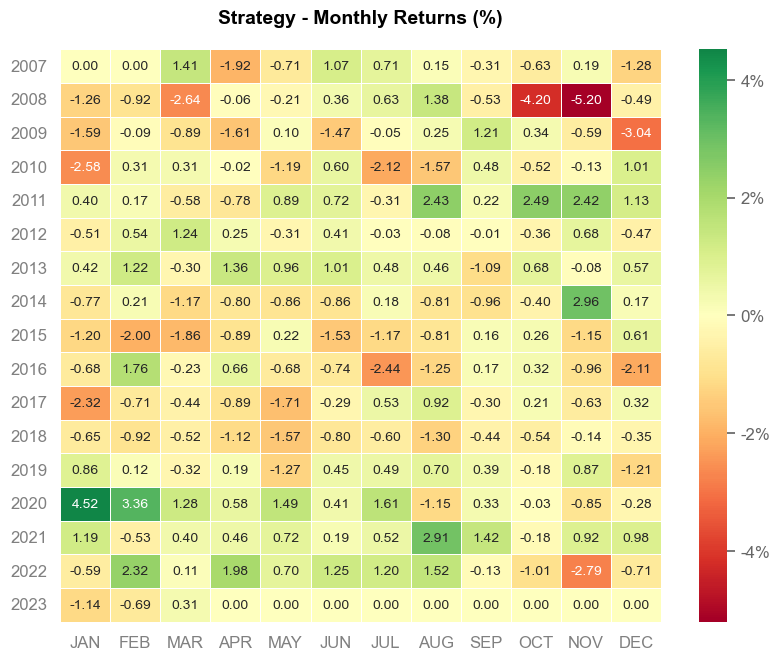

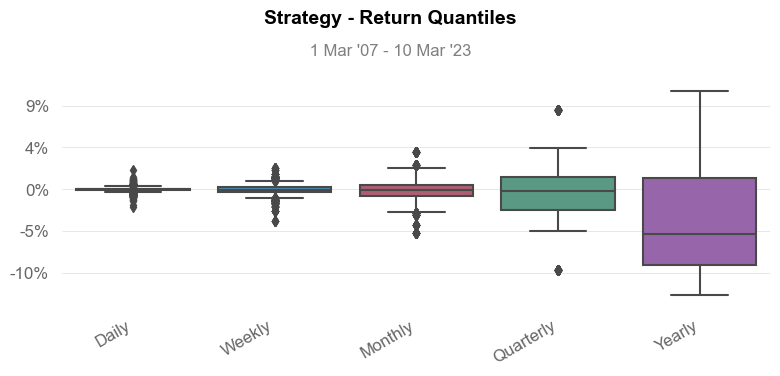

In [28]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [31]:
TF = 'M30'

In [32]:
data_1 = XAUUSD[TF]

In [33]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

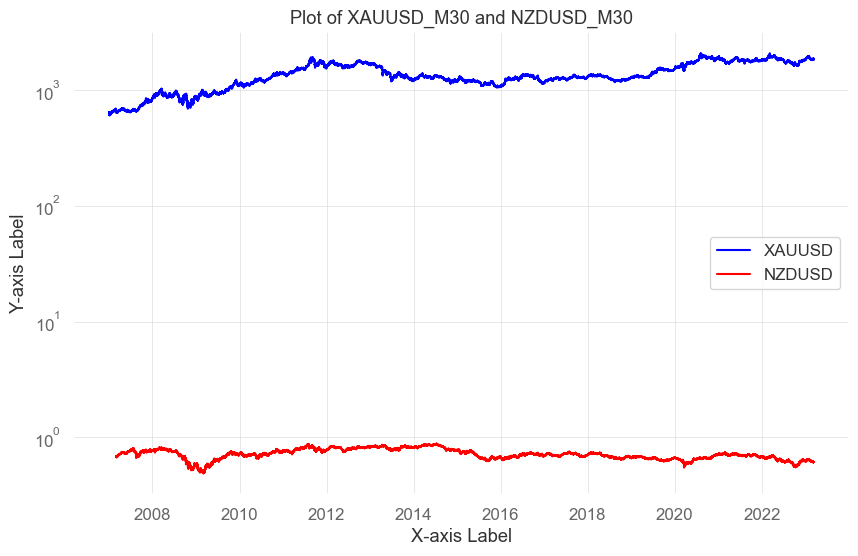

In [34]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [35]:
KF = Kalman_Filter(data_1, data_2)

In [36]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          2.943e+06
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                        0.00
Time:                        00:13:15   Log-Likelihood:                     -1.4556e+06
No. Observations:              200000   AIC:                                  2.911e+06
Df Residuals:                  199999   BIC:                                  2.911e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.7369      1.085   1715.580      0.000    1858.611    1862.863
==============================================================================
Omnibus:                     2968.038   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2418.819
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       2.636   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          4.72%
CAGR﹪                     0.2%

Sharpe                     0.12
Prob. Sharpe Ratio         70.41%
Smart Sharpe               0.12
Sortino                    0.17
Smart Sortino              0.17
Sortino/√2                 0.12
Smart Sortino/√2           0.12
Omega                      1.02

Max Drawdown               -17.23%
Longest DD Days            5464
Volatility (ann.)          2.11%
Calmar                     0.01
Skew                       -0.15
Kurtosis                   6.14

Expected Daily %           0.0%
Expected Monthly %         0.02%
Expected Yearly %          0.27%
Kelly Criterion            1.09%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive Wins       16

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-08-27,2019-06-13,2022-08-11,5464,-17.225328,-16.620456
2,2007-03-14,2007-05-06,2007-07-26,135,-1.883941,-1.858060
3,2022-09-11,2022-11-10,2022-11-24,75,-0.881201,-0.860744
4,2007-08-09,2007-08-15,2007-08-17,9,-0.839423,-0.456374
5,2022-12-25,2023-01-24,2023-03-10,76,-0.682165,-0.596431


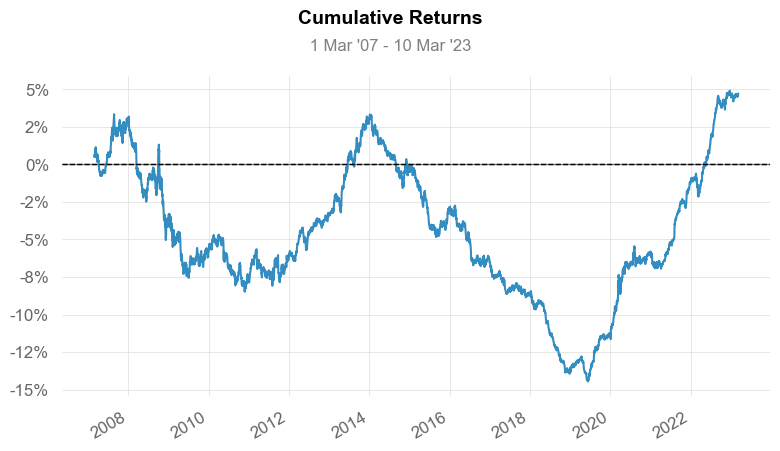

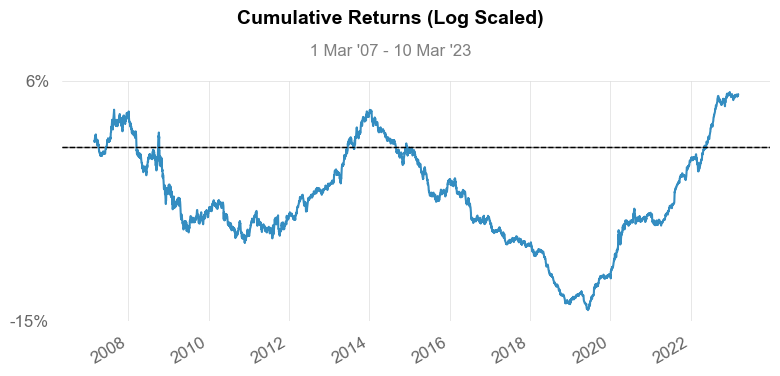

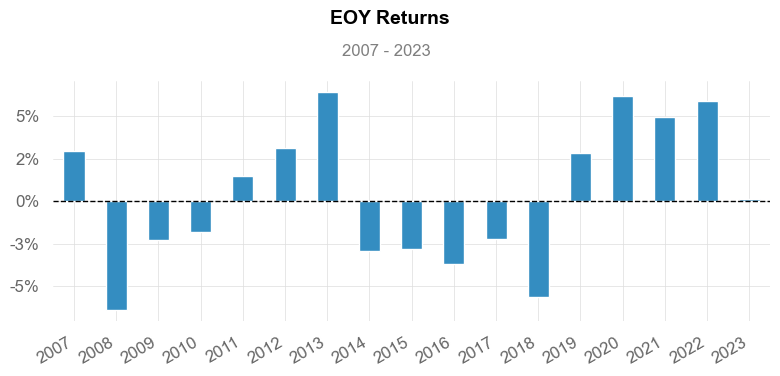

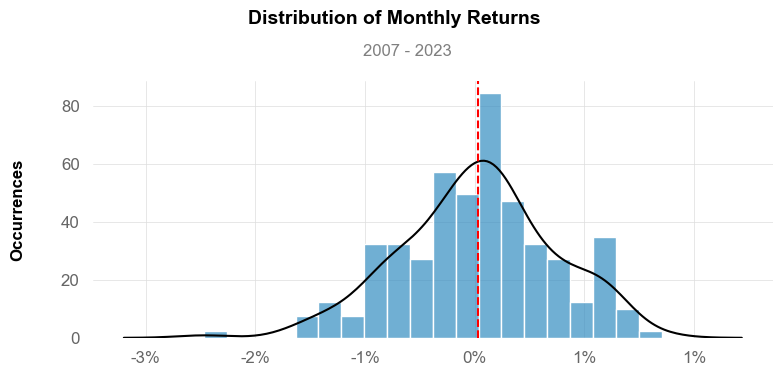

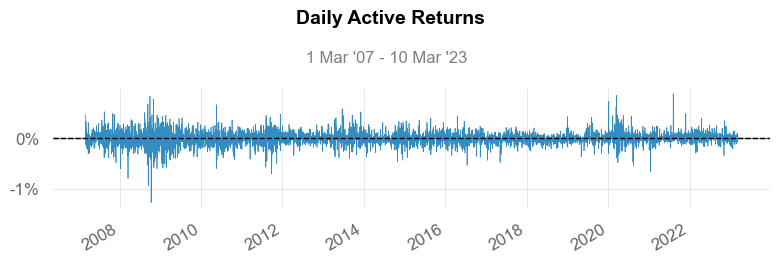

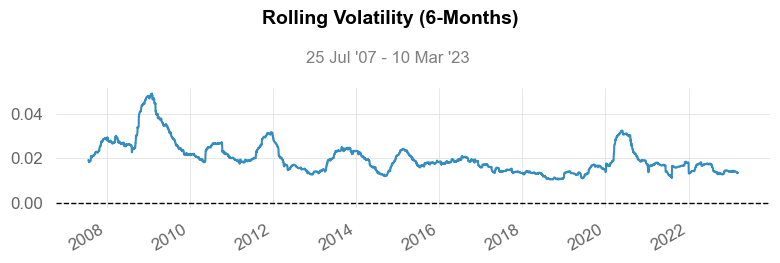

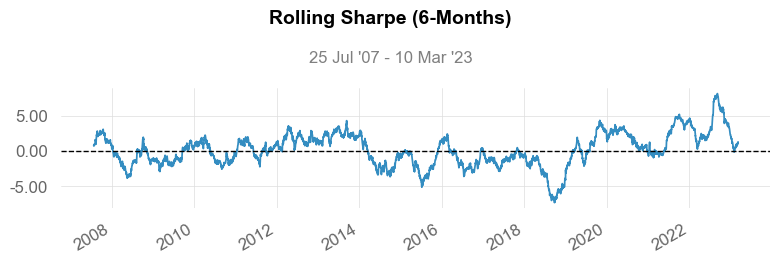

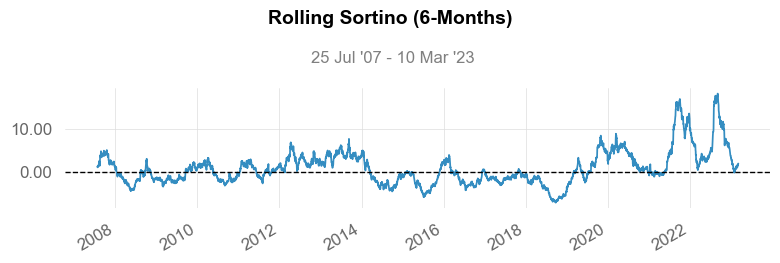

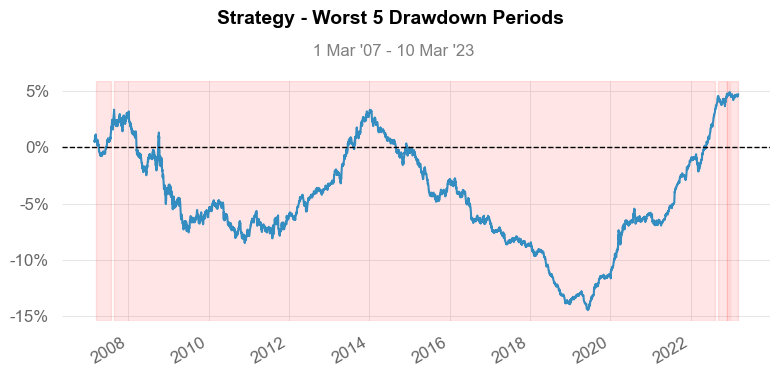

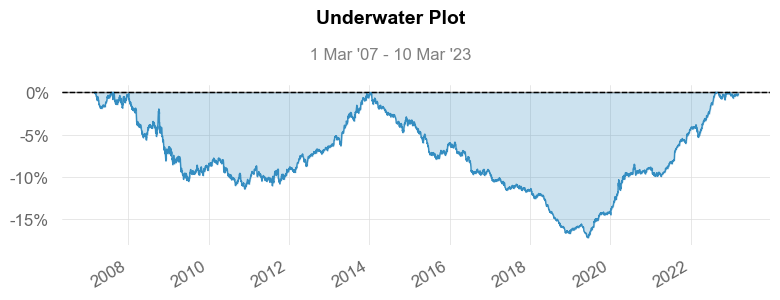

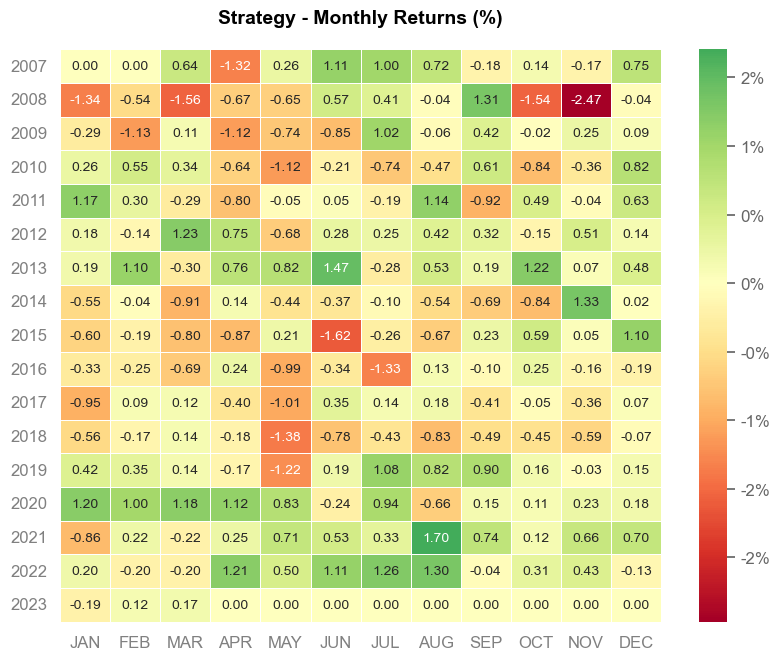

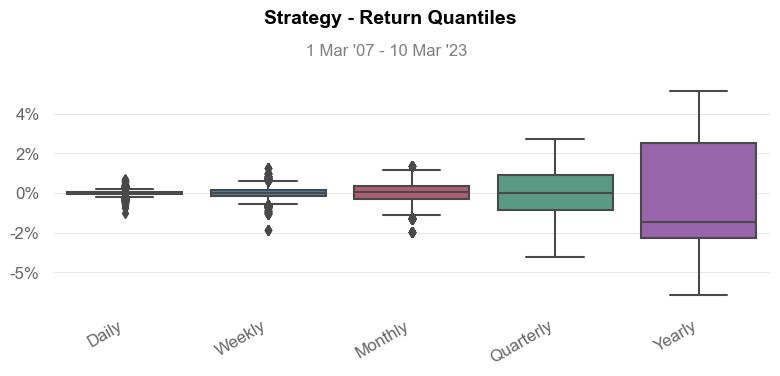

In [38]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())